### Loads raw input volumetric data(numpy array) and convert to 2D images training format in HIGH and LOW folders
* input image -> WH
* output image -> WH

In [1]:
import os, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import h5py
import helpers as H
from tqdm import tqdm

#Root directory of the project
ROOT_DIR = os.path.abspath(".")
TRAIN_DATASET_PATH = os.path.join(ROOT_DIR, "dataset")

# Dataset directories
LOW_DIR = "singlecoil_train_3D_images_48x/low/"
HIGH_DIR = "singlecoil_train_3D_images_48x/high/"

LOW_DIR_PATH = os.path.join(TRAIN_DATASET_PATH, LOW_DIR)
HIGH_DIR_PATH = os.path.join(TRAIN_DATASET_PATH, HIGH_DIR)
LOW_DIR_PATH, HIGH_DIR_PATH

('E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/low/',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/high/')

In [2]:
w, h = 128, 128
def rs_img(img):
    '''W and H is 128 now
    '''
    print(img.shape[-1])
    print(type(img.shape[-1]))
    flatten = [cv2.resize(img[:,:,i], (w, h), interpolation=cv2.INTER_CUBIC) for i in range(img.shape[-1])]
    img = np.array(np.dstack(flatten)) 
    return img


def change_depth(img):

    img_start = img[:,:,:4]
    
    mid = int(img.shape[-1]/2)
    img_middle = img[:,:,mid-10:mid+10]
    
    img_end = img[:,:,-4:]
    img = np.concatenate((img_start, img_middle, img_end), axis=2)
    return img


def show_slices(data, slice_nums, cmap=None):
    data = np.moveaxis(data, 2, 0)
    fig = plt.figure(figsize=(16, 16))
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)        

#### Check number of contents

In [3]:
len(os.listdir(LOW_DIR_PATH)), len(os.listdir(HIGH_DIR_PATH))

(973, 973)

In [4]:
low_full_paths = ["{}/{}".format(LOW_DIR_PATH,l) for l in H.sort_paths(os.listdir(LOW_DIR_PATH))]
high_full_paths = ["{}/{}".format(HIGH_DIR_PATH,h) for h in H.sort_paths(os.listdir(HIGH_DIR_PATH))]

len(low_full_paths), len(high_full_paths)

(973, 973)

In [5]:
low_full_paths[:4]

['E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/low//1.npy',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/low//2.npy',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/low//3.npy',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/low//4.npy']

In [6]:
high_full_paths[:4]

['E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/high//1.npy',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/high//2.npy',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/high//3.npy',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_3D_images_48x/high//4.npy']

In [7]:
# Make folder for low and high res

LOW_DIR_2D = "singlecoil_train_2D_images/low/"
HIGH_DIR_2D = "singlecoil_train_2D_images/high/"

H.create_directory("{}/{}".format(TRAIN_DATASET_PATH, LOW_DIR_2D))
H.create_directory("{}/{}".format(TRAIN_DATASET_PATH, HIGH_DIR_2D))

In [8]:
LOW_DIR_2D_PATH = os.path.join(TRAIN_DATASET_PATH, LOW_DIR_2D)
HIGH_DIR_2D_PATH = os.path.join(TRAIN_DATASET_PATH, HIGH_DIR_2D)
LOW_DIR_2D_PATH, HIGH_DIR_2D_PATH

('E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_2D_images/low/',
 'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_2D_images/high/')

#### Low MRI 3D to 2D image slices

(Each slice from the volumetric data is normalized, NOT the whole volumetric data at once.)

In [9]:
c=0
total_slices = 0

x_train = []

for l in tqdm(low_full_paths[:]):
    img_3d = np.load("{}".format(l))
    img_3d = np.moveaxis(img_3d, 0, 2)
    slices = img_3d.shape[-1]
    total_slices+=slices
    
    # iterate over each slice and save
    for i in range(slices):
        img = img_3d[:,:,i]
        
        #x_train.append(img)
        
        #img = H.normalize(img) # Normalize image
        #cv2.imwrite("{}/{}_{}.png".format(LOW_DIR_2D_PATH, c, i), img * 255)
        np.save("{}/{}_{}.npy".format(LOW_DIR_2D_PATH, c, i), img)
        img = None
        
    img_3d = None
    c+=1

#x_train = np.array(x_train)
#print(x_train.shape)
print("Total slices: {}".format(total_slices))

100%|████████████████████████████████████████████████████████████████████████████████| 973/973 [06:46<00:00,  2.85it/s]


Total slices: 34742


#### HIGH MRI VOLUMES

In [10]:
c=0
total_slices = 0

y_train = []

for l in tqdm(high_full_paths[:]):
    img_3d = np.load("{}".format(l))
    img_3d = np.moveaxis(img_3d, 0, 2)
    slices = img_3d.shape[-1]
    total_slices+=slices
    
    # iterate over each slice and save
    for i in range(slices):
        img = img_3d[:,:,i]
        
        
        #y_train.append(img)
        
        
        #img = H.normalize(img) # Normalize image
        #cv2.imwrite("{}/{}_{}.png".format(HIGH_DIR_2D_PATH, c, i), img * 255)
        np.save("{}/{}_{}.npy".format(HIGH_DIR_2D_PATH, c, i), img)
        img = None
        
    img_3d = None
    c+=1
    
#y_train = np.array(y_train)
#print(y_train.shape)
print("Total slices: {}".format(total_slices))

100%|████████████████████████████████████████████████████████████████████████████████| 973/973 [06:55<00:00,  2.09it/s]


Total slices: 34742



### Remember to rescale using img/255.0 after loading images

`img = cv2.imread("test.png", 0)
img = x/255.0 # Rescale to 0-1
`


In [11]:
len(os.listdir(LOW_DIR_2D_PATH)), len(os.listdir(HIGH_DIR_2D_PATH))

(34742, 34742)

### Load and check saved image

#img_test = cv2.imread("{}/{}".format(HIGH_DIR_2D_PATH, "0_23.png"), 0) / 255.0
img_test = np.load("{}/{}".format(HIGH_DIR_2D_PATH, "0_24.npy"))
img_test.shape

plt.imshow(img_test, cmap='gray')

H.plot_hist(img_test)

#img_test = cv2.imread("{}/{}".format(HIGH_DIR_2D_PATH, "0_23.png"), 0) / 255.0
img_test = np.load("{}/{}".format(LOW_DIR_2D_PATH, "0_24.npy"))
img_test.shape

plt.imshow(img_test, cmap='gray')

H.plot_hist(img_test)

low_full_paths = ["{}/{}".format(LOW_DIR_2D_PATH,l) for l in H.sort_paths(os.listdir(LOW_DIR_2D_PATH))]
high_full_paths = ["{}/{}".format(HIGH_DIR_2D_PATH,h) for h in H.sort_paths(os.listdir(HIGH_DIR_2D_PATH))]

low_full_paths[:3], high_full_paths[:3]

### Load from folder

x_train = []
c=0

for l in tqdm(low_full_paths[:]):
    #x = cv2.imread("{}".format(l), 0) / 255.0
    x = np.load("{}".format(l))
    x_train.append(x)
    c+=1
    #print(c, "----", l, x.shape)
    
    
x_train = np.array(x_train)
x_train.shape

y_train = []
c=0

for l in tqdm(high_full_paths[:]):
    #x = cv2.imread("{}".format(l), 0) / 255.0
    x = np.load("{}".format(l))
    y_train.append(x)
    c+=1
    #print(c, "----", l, x.shape)

y_train = np.array(y_train)
y_train.shape

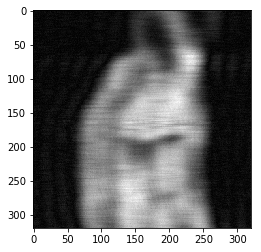

In [13]:
plt.imshow(x_train[200], cmap='gray')

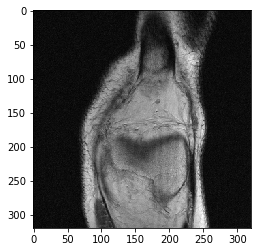

In [14]:
plt.imshow(y_train[200], cmap='gray')

In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], 320, 320, 1))
y_train = np.reshape(y_train, (y_train.shape[0], 320, 320, 1))

x_train.shape, y_train.shape

((34742, 320, 320, 1), (34742, 320, 320, 1))

2.8018498e-08 9.2986855e-05


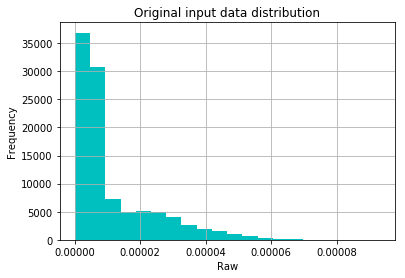

In [16]:
H.plot_hist(x_train[5])

6.3009134e-06 9.9391575e-05


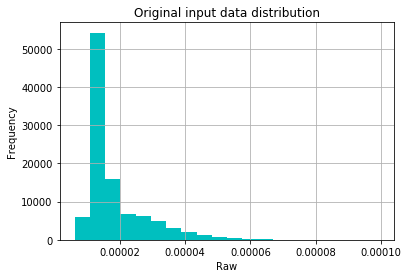

In [17]:
H.plot_hist(y_train[5])

In [18]:
SAVE_DATA_PATH = os.path.join(TRAIN_DATASET_PATH, "singlecoil_train_2D_images/")
SAVE_DATA_PATH

'E:\\FastMRI\\MRI-reconstruction\\dataset\\singlecoil_train_2D_images/'

In [20]:
np.save("{}/x_train.npy".format(SAVE_DATA_PATH), x_train)
np.save("{}/y_train.npy".format(SAVE_DATA_PATH), y_train)

## Train time
* Run cyclegan using unnormalized low and high res images

### During test time:
* load from *.h5 files and convert and save to npy
* for each npy file
    make folder of npy file name
    convert each slice and save in folder
* Now we have X number of test volume folders which have all slices
* Run 2D model on each folder(npy file) and reconstruct output volume

In [ ]:
print("Done!")